In [1]:
import math
import numpy as np

In [2]:
h = 25 # Heat Transfer Coefficient
k = 385 # Thermal Conductivity

In [3]:
d = 7.5*10**(-3) # Diameter of Fin 
l = 0.1
p = 2*math.pi*d/2 # Perimeter of cross section
A = math.pi*(d**2)/4 # Area 

In [4]:
m = h*p/(k*A)
T_b = 500
T_a = 25
T1 = T_b - T_a

In [5]:
grid_size = 60

In [ ]:
#  (1/x^2)*T_i+1 - ( m + 2/x^2)*T_i + (1/x^2)*T_i-1 = 0

In [6]:
def Matrix(grid_size,x):
    Tridia_mat=[]
    for i in range(0,grid_size-2):
        row = []
        cnt=0
        if i!=0 and i!=(grid_size-2):
            for j in range(0,grid_size-2):
                if (j==i-1 or j==i+1):
                    row.append(1.0/(x**2))
                elif(j==i):
                    row.append(-(2.0/(x**2) + m))
                else:
                    row.append(0)
        elif i==0:
            row = [0 for j in range(0,grid_size-2)]
            row[0],row[1] = -(2.0/(x**2) + m),1.0/(x**2)
        else:
            row = [0 for j in range(0,grid_size-2)]
            row[-1],row[-2] = -(2.0/(x**2) + m),1.0/(x**2)
        Tridia_mat.append(np.array(row))

    Tridia_mat = np.array(Tridia_mat)
    return Tridia_mat

In [7]:
# Define Boundary Conditions
def boundary_conditions(x,bdry_type='insulated',T_t = 0):
    B = [0 for i in range(0,grid_size-2)]
    B[0] = -(1.0/(x**2))*T1
    B[-1] = T_t
    return B

In [8]:
def TDMA(A,B,grid_size,x,bdry_type='insulated'):
    for i in range(1,grid_size-2):
        A[i][i] = A[i][i] - (float(A[i][i-1])/A[i-1][i-1])*A[i-1][i]
        B[i] = B[i] - (float(A[i][i-1])/A[i-1][i-1])*B[i-1]
        A[i][i-1] = 0
    
    X=[0 for j in range(grid_size-3,-1,-1)]
    for j in range(grid_size-3,-1,-1):
        if j!=(grid_size-3):
            X[j] = (B[j] - A[j][j+1] * X[j + 1]) / A[j][j]
        elif (bdry_type == 'insulated'):
            X[j] =B[j]/(A[j][j]+1.0/(x**2))
        elif (bdry_type == 't_spec'):
            X[j] =B[j]/(A[j][j])
        elif (bdry_type == 'conv'):
            X[j] =B[j]/(A[j][j]+1.0/((x**2)*(1+(h*x/k))))
    return X
        

In [16]:
def find_sol(grid_size):
    x = l/(grid_size-1)
    Tridia_mat = Matrix(grid_size,x)
    B = boundary_conditions(x,T_t=0)
    # print(Tridia_mat,B)
    X =TDMA(Tridia_mat,B,grid_size,x)
    x0= [i*x for i in range(1,grid_size-1)]  
    m_sqrt = math.sqrt(m)
    analytical=[]
    for i in x0:
        analytical.append(T1*math.cosh(m_sqrt*(l-i))/math.cosh(m_sqrt*(l))) 
    plt.plot(x0,X,label='For grid size= ' + str(grid_size))
    plt.plot(x0,analytical,label='Analytical Solution')
    plt.xlabel('x (from fin base)')
    plt.ylabel('T - T_infinity (C)')
    plt.title('Temperature distribution along fin for gridsize= '+str(grid_size))
    plt.legend()
#     plt.show()
    

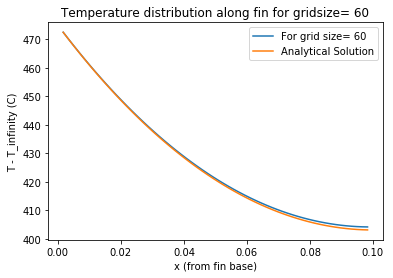

In [21]:
find_sol(60)
plt.savefig('fig4.pdf')

In [12]:
import matplotlib.pyplot as plt
